In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest

In [2]:
data = pd.read_csv('C:/Users/mbond/Downloads/portofoliodata/portofoliopython/energyconsomtion.csv', delimiter=';')
data

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,25030569984,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,25151762432,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [29]:
# nous allons étudier la consommation mondiale du pétrole et en Afrique
# drop unwanted columns
# Liste des colonnes à conserver
data = pd.read_csv('C:/Users/mbond/Downloads/portofoliodata/portofoliopython/energyconsomtion.csv', delimiter=';')

# Liste des colonnes à supprimer
colonnes_a_conserver = [
    'country', 'year', 'electricity_share_energy', 'fossil_elec_per_capita',
    'oil_consumption', 'oil_production'],

# Supprimer toutes les colonnes qui ne sont pas dans la liste
colonnes_a_supprimer = [col for col in data.columns if col not in colonnes_a_conserver]
data = data.drop(columns=colonnes_a_supprimer)

# Supprimer les lignes avec des valeurs manquantes
data_drop_na = data.dropna()

# Supprimer les enregistrements avec oil_consumption = 0
data_drop_oil_zero = data_drop_na[data_drop_na['oil_consumption'] > 0]

In [44]:
# Supprimer les lignes avec des valeurs manquantes
data_cleaned = data.dropna()

# Supprimer les enregistrements où oil_consumption est égale à zéro
data_cleaned = data_cleaned[data_cleaned['oil_consumption'] != 0]

# Réindexer le DataFrame après la suppression
data_cleaned = data_cleaned.reset_index(drop=True)

# Afficher le DataFrame résultant
print(data_cleaned)


     country  year  oil_consumption  oil_production
0     Africa  1965          325.901        1233.096
1     Africa  1966          356.710        1569.275
2     Africa  1967          353.833        1726.330
3     Africa  1968          373.394        2212.528
4     Africa  1969          378.536        2813.719
...      ...   ...              ...             ...
2482   World  2015        50891.976       50658.259
2483   World  2016        51920.156       50843.437
2484   World  2017        52567.520       51013.260
2485   World  2018        53181.125       52244.640
2486   World  2019        53619.925       52069.986

[2487 rows x 4 columns]


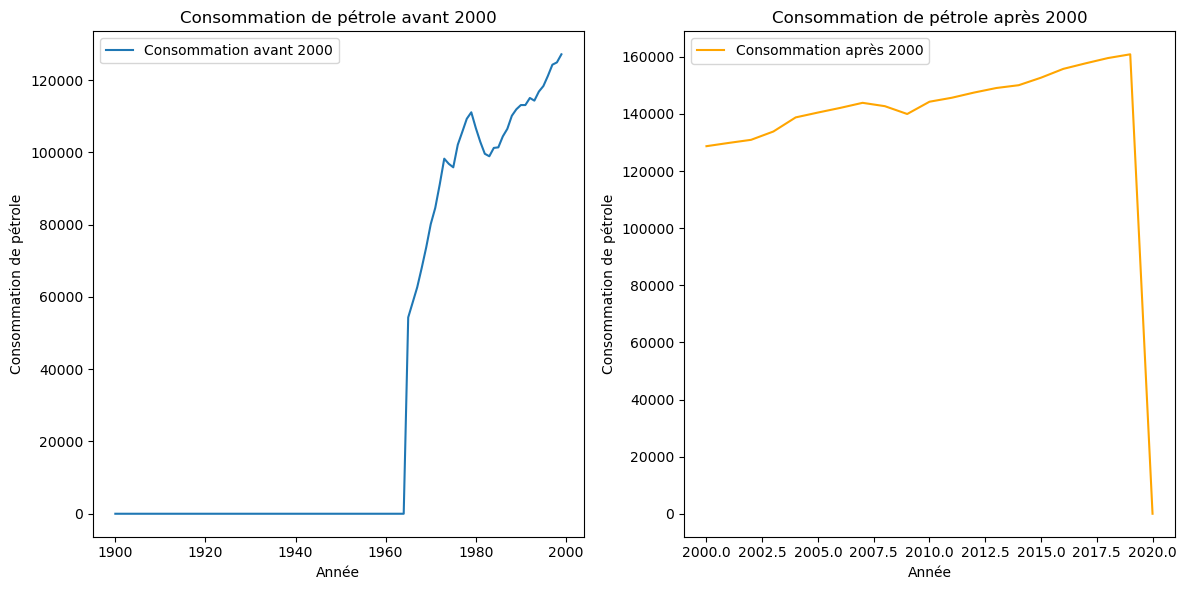

In [137]:
# Filtrer les données pour obtenir deux DataFrames distincts : avant et après 2000
data_before_2000 = data[data['year'] < 2000]
data_after_2000 = data[data['year'] >= 2000]

# Calculer la somme de la consommation de pétrole par année pour chaque DataFrame
consumption_before_2000 = data_before_2000.groupby('year')['oil_consumption'].sum()
consumption_after_2000 = data_after_2000.groupby('year')['oil_consumption'].sum()

# Créer un graphique avec deux sous-graphiques sur un même plan
plt.figure(figsize=(12, 6))

# Premier sous-graphique : avant 2000
plt.subplot(1, 2, 1)
plt.plot(consumption_before_2000.index, consumption_before_2000.values, label='Consommation avant 2000')
plt.title('Consommation de pétrole avant 2000')
plt.xlabel('Année')
plt.ylabel('Consommation de pétrole')
plt.legend()

# Deuxième sous-graphique : après 2000
plt.subplot(1, 2, 2)
plt.plot(consumption_after_2000.index, consumption_after_2000.values, label='Consommation après 2000', color='orange')
plt.title('Consommation de pétrole après 2000')
plt.xlabel('Année')
plt.ylabel('Consommation de pétrole')
plt.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


In [18]:
# Supprimer toutes les lignes où la colonne "country" est égale à "World"
data = data[data['country'] != 'World']

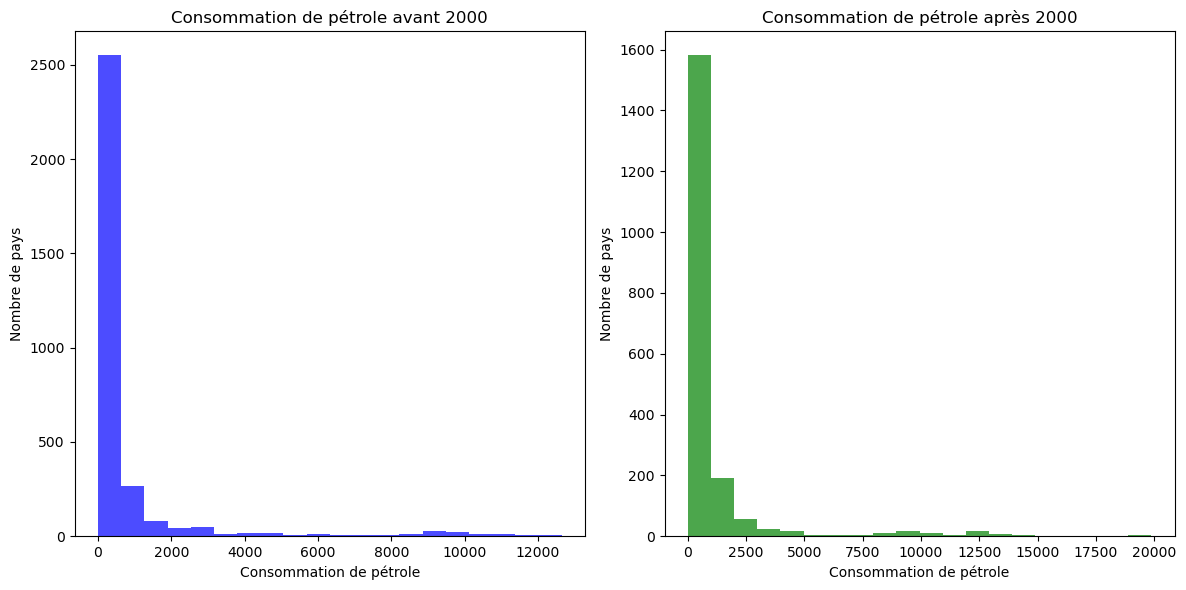

In [21]:

# Filtrer les données pour obtenir celles avant et après l'année 2000
avant_2000 = data[data['year'] < 2000]
apres_2000 = data[data['year'] >= 2000]

# Créer un histogramme pour la consommation de pétrole avant 2000
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Crée la première sous-trace
plt.hist(avant_2000['oil_consumption'], bins=20, color='blue', alpha=0.7)
plt.title('Consommation de pétrole avant 2000')
plt.xlabel('Consommation de pétrole')
plt.ylabel('Nombre de pays')

# Créer un histogramme pour la consommation de pétrole après 2000
plt.subplot(1, 2, 2)  # Crée la deuxième sous-trace
plt.hist(apres_2000['oil_consumption'], bins=20, color='green', alpha=0.7)
plt.title('Consommation de pétrole après 2000')
plt.xlabel('Consommation de pétrole')
plt.ylabel('count')

# Afficher les deux histogrammes sur le même graphique
plt.tight_layout()  # Pour éviter que les graphiques se chevauchent
plt.show()


In [85]:
# nous allons étudier la consommation mondiale du pétrole et en Afrique
# drop unwanted columns
# Liste des colonnes à conserver
fuel = pd.read_csv('C:/Users/mbond/Downloads/portofoliodata/portofoliopython/energyconsomtion.csv', delimiter=';')

# Liste des colonnes à supprimer
colonnes_a_conserver = [
    'country', 'year', 'electricity_share_energy', 'fossil_elec_per_capita',
    'oil_consumption', 'oil_production'
]

# Supprimer toutes les colonnes qui ne sont pas dans la liste
colonnes_a_supprimer = [col for col in data.columns if col not in colonnes_a_conserver]
fuel = fuel.drop(columns=colonnes_a_supprimer)
fuel

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,25030569984,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,25151762432,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [86]:
data

,country,year,oil_consumption,oil_production
0,Afghanistan,1900,NaN,NaN
1,Afghanistan,1901,NaN,NaN
2,Afghanistan,1902,NaN,NaN
3,Afghanistan,1903,NaN,NaN
4,Afghanistan,1904,NaN,NaN
...,...,...,...,...
17427,Zimbabwe,2015,NaN,NaN
17428,Zimbabwe,2016,NaN,NaN
17429,Zimbabwe,2017,NaN,NaN
17430,Zimbabwe,2018,NaN,NaN


In [116]:

%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest
# Lire le fichier CSV
fuel = pd.read_csv('C:/Users/mbond/Downloads/portofoliodata/portofoliopython/energyconsomtion.csv', delimiter=';')

# Sélectionner uniquement les colonnes nécessaires
fuel = fuel[['country', 'year', 'oil_consumption', 'oil_production']]

# Afficher les premières lignes du DataFrame résultant
fuel


,country,year,oil_consumption,oil_production
0,Afghanistan,1900,NaN,NaN
1,Afghanistan,1901,NaN,NaN
2,Afghanistan,1902,NaN,NaN
3,Afghanistan,1903,NaN,NaN
4,Afghanistan,1904,NaN,NaN
...,...,...,...,...
17427,Zimbabwe,2015,NaN,NaN
17428,Zimbabwe,2016,NaN,NaN
17429,Zimbabwe,2017,NaN,NaN
17430,Zimbabwe,2018,NaN,NaN


In [118]:
# Drop rows with any null value in any of the specified columns
fuel.dropna(subset=['country', 'year', 'oil_consumption', 'oil_production'], inplace=True)

# Display the resulting DataFrame
print(fuel.head())

    country  year  oil_consumption  oil_production
185  Africa  1965          325.901        1233.096
186  Africa  1966          356.710        1569.275
187  Africa  1967          353.833        1726.330
188  Africa  1968          373.394        2212.528
189  Africa  1969          378.536        2813.719


In [123]:
# Supprimer les lignes où 'oil_consumption' est égal à 0
fuel = fuel[fuel['oil_consumption'] != 0]

# Afficher le DataFrame résultant
# Supprimer les lignes où la colonne 'country' contient 'World'
fuel = fuel[fuel['country'] != 'World']
fuel

,country,year,oil_consumption,oil_production
185,Africa,1965,325.901,1233.096
186,Africa,1966,356.710,1569.275
187,Africa,1967,353.833,1726.330
188,Africa,1968,373.394,2212.528
189,Africa,1969,378.536,2813.719
...,...,...,...,...
16803,Vietnam,2015,251.063,199.351
16804,Vietnam,2016,264.637,180.100
16805,Vietnam,2017,273.223,160.814
16806,Vietnam,2018,284.293,144.094


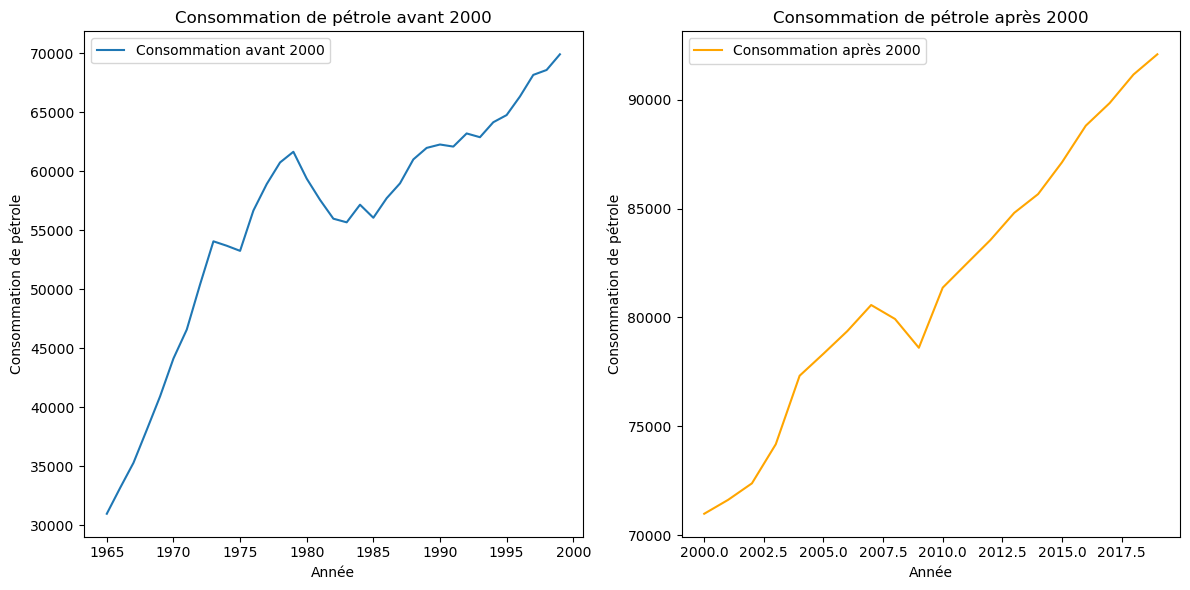

In [124]:
# Filtrer les données pour obtenir deux DataFrames distincts : avant et après 2000
fuel_before_2000 = fuel[fuel['year'] < 2000]
fuel_after_2000 = fuel[fuel['year'] >= 2000]

# Calculer la somme de la consommation de pétrole par année pour chaque DataFrame
consumption_before_2000 = fuel_before_2000.groupby('year')['oil_consumption'].sum()
consumption_after_2000 = fuel_after_2000.groupby('year')['oil_consumption'].sum()

# Créer un graphique avec deux sous-graphiques sur un même plan
plt.figure(figsize=(12, 6))

# Premier sous-graphique : avant 2000
plt.subplot(1, 2, 1)
plt.plot(consumption_before_2000.index, consumption_before_2000.values, label='Consommation avant 2000')
plt.title('Consommation de pétrole avant 2000')
plt.xlabel('Année')
plt.ylabel('Consommation de pétrole')
plt.legend()

# Deuxième sous-graphique : après 2000
plt.subplot(1, 2, 2)
plt.plot(consumption_after_2000.index, consumption_after_2000.values, label='Consommation après 2000', color='orange')
plt.title('Consommation de pétrole après 2000')
plt.xlabel('Année')
plt.ylabel('Consommation de pétrole')
plt.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


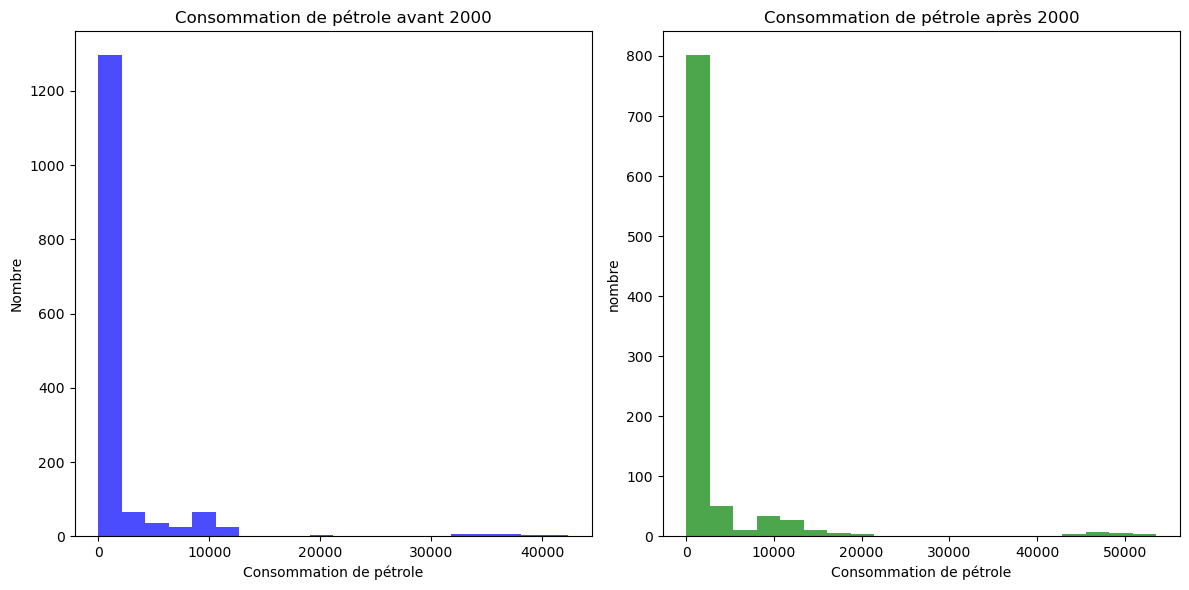

In [120]:
# Filtrer les données pour obtenir celles avant et après l'année 2000
avant_2000 = fuel[fuel['year'] < 2000]
apres_2000 = fuel[fuel['year'] >= 2000]

# Créer un histogramme pour la consommation de pétrole avant 2000
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Crée la première sous-trace
plt.hist(avant_2000['oil_consumption'], bins=20, color='blue', alpha=0.7)
plt.title('Consommation de pétrole avant 2000')
plt.xlabel('Consommation de pétrole')
plt.ylabel('Nombre')

# Créer un histogramme pour la consommation de pétrole après 2000
plt.subplot(1, 2, 2)  # Crée la deuxième sous-trace
plt.hist(apres_2000['oil_consumption'], bins=20, color='green', alpha=0.7)
plt.title('Consommation de pétrole après 2000')
plt.xlabel('Consommation de pétrole')
plt.ylabel('nombre')

# Afficher les deux histogrammes sur le même graphique
plt.tight_layout()  # Pour éviter que les graphiques se chevauchent
plt.show()

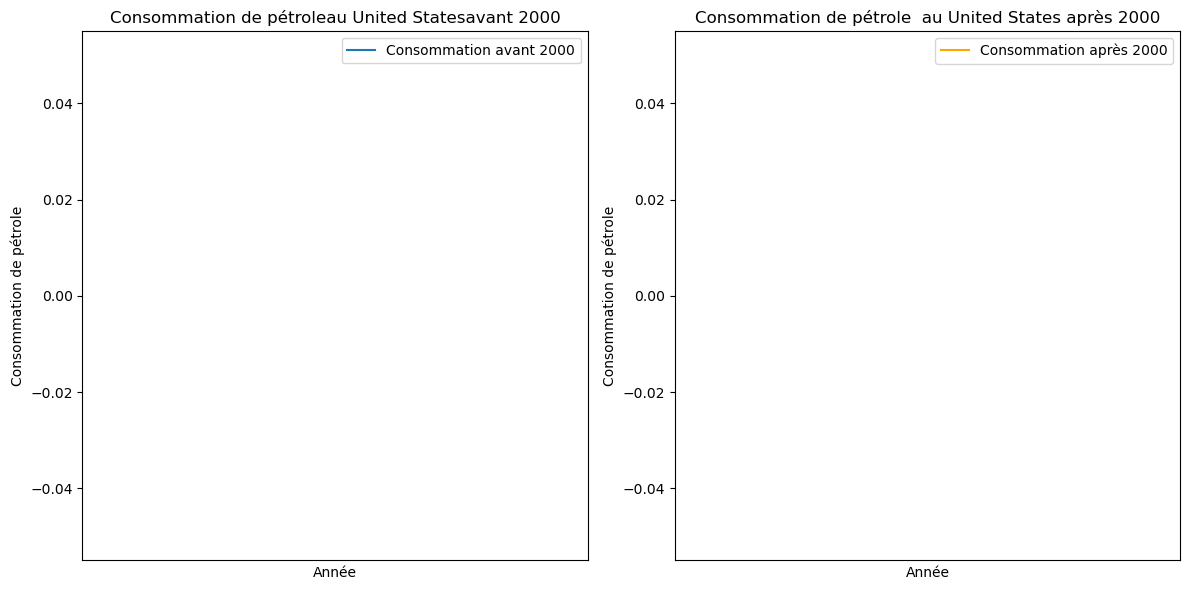

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Sélectionner les lignes où la colonne 'country' contient 'Afrique'
fuel_afrique = fuel.loc[fuel['country'] == 'United States']

# Filtrer les données pour obtenir deux DataFrames distincts : avant et après 2000
fuel_before_2000 = fuel_afrique[fuel_afrique['year'] < 2000]
fuel_after_2000 = fuel_afrique[fuel_afrique['year'] >= 2000]

# Calculer la somme de la consommation de pétrole par année pour chaque DataFrame
consumption_before_2000 = fuel_before_2000.groupby('year')['oil_consumption'].sum()
consumption_after_2000 = fuel_after_2000.groupby('year')['oil_consumption'].sum()

# Créer un graphique avec deux sous-graphiques sur un même plan
plt.figure(figsize=(12, 6))

# Premier sous-graphique : avant 2000
plt.subplot(1, 2, 1)
plt.plot(consumption_before_2000.index, consumption_before_2000.values, label='Consommation avant 2000')
plt.title('Consommation de pétroleau United Statesavant 2000')
plt.xlabel('Année')
plt.ylabel('Consommation de pétrole')
plt.xticks(consumption_before_2000.index[::5], rotation=45)  # Échelle des années avec une rotation de 45 degrés
plt.legend()

# Deuxième sous-graphique : après 2000
plt.subplot(1, 2, 2)
plt.plot(consumption_after_2000.index, consumption_after_2000.values, label='Consommation après 2000', color='orange')
plt.title('Consommation de pétrole  au United States après 2000')
plt.xlabel('Année')
plt.ylabel('Consommation de pétrole')
plt.xticks(consumption_after_2000.index[::5], rotation=45)  # Échelle des années avec une rotation de 45 degrés
plt.legend()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()


In [127]:
fuel

,country,year,oil_consumption,oil_production
185,Africa,1965,325.901,1233.096
186,Africa,1966,356.710,1569.275
187,Africa,1967,353.833,1726.330
188,Africa,1968,373.394,2212.528
189,Africa,1969,378.536,2813.719
...,...,...,...,...
16803,Vietnam,2015,251.063,199.351
16804,Vietnam,2016,264.637,180.100
16805,Vietnam,2017,273.223,160.814
16806,Vietnam,2018,284.293,144.094


In [129]:
fuel

,country,year,oil_consumption,oil_production
185,Africa,1965,325.901,1233.096
186,Africa,1966,356.710,1569.275
187,Africa,1967,353.833,1726.330
188,Africa,1968,373.394,2212.528
189,Africa,1969,378.536,2813.719
...,...,...,...,...
16803,Vietnam,2015,251.063,199.351
16804,Vietnam,2016,264.637,180.100
16805,Vietnam,2017,273.223,160.814
16806,Vietnam,2018,284.293,144.094


In [136]:

import plotly.express as px
import plotly.graph_objects as go

# Filtrer les données pour obtenir deux DataFrames distincts : avant et après 2000
fuel_before_2000 = fuel_afrique[fuel_afrique['year'] < 2000]
fuel_after_2000 = fuel_afrique[fuel_afrique['year'] >= 2000]

# Calculer la somme de la consommation de pétrole par année pour chaque DataFrame
consumption_before_2000 = fuel_before_2000.groupby('year')['oil_consumption'].sum()
consumption_after_2000 = fuel_after_2000.groupby('year')['oil_consumption'].sum()

# Créer un graphique interactif avec Plotly
fig = go.Figure()

# Ajouter une trace pour la consommation avant 2000
fig.add_trace(go.Scatter(x=consumption_before_2000.index, y=consumption_before_2000.values, mode='lines', name='Consommation avant 2000'))

# Ajouter une trace pour la consommation après 2000
fig.add_trace(go.Scatter(x=consumption_after_2000.index, y=consumption_after_2000.values, mode='lines', name='Consommation après 2000', line=dict(color='orange')))

# Mettre en forme les étiquettes des axes et le titre
fig.update_layout(
    title='Consommation de pétrole en Afrique',
    xaxis_title='Année',
    yaxis_title='Consommation de pétrole',
    xaxis=dict(type='category', categoryorder='total descending', dtick=5),
)

# Afficher le graphique interactif
fig.show()



In [135]:
# Convertir les valeurs de la colonne 'country' en minuscules
fuel['country'] = fuel['country'].str.lower()

# Sélectionner les lignes où la colonne 'country' contient 'afrique'
fuel_afrique = fuel[fuel['country'] == 'afrique']
fuel

,country,year,oil_consumption,oil_production
185,africa,1965,325.901,1233.096
186,africa,1966,356.710,1569.275
187,africa,1967,353.833,1726.330
188,africa,1968,373.394,2212.528
189,africa,1969,378.536,2813.719
...,...,...,...,...
16803,vietnam,2015,251.063,199.351
16804,vietnam,2016,264.637,180.100
16805,vietnam,2017,273.223,160.814
16806,vietnam,2018,284.293,144.094
